# Notebook #02: Subtraction Analyses

In [2]:
# Import modules
from nilearn import image, plotting, reporting


# Define function for performing a single ALE subtraction analysis
def run_subtraction(text_file1, text_file2, voxel_thresh, cluster_size, n_iters, output_dir):
    print('SUBTRACTION ANALYSIS FOR "' + text_file1 + '" MINUS "' +
          text_file2 + '" WITH ' + str(n_iters) + ' PERMUTATIONS')
    # Read Sleuth files
    from nimare import io, meta
    dset1 = io.convert_sleuth_to_dataset(text_file=text_file1)
    dset2 = io.convert_sleuth_to_dataset(text_file=text_file2)
    # Perform subtraction analysis
    sub = meta.cbma.ALESubtraction(n_iters=n_iters, low_memory=False)
    sres = sub.fit(dset1, dset2)
    # Create thresholded z-map
    from nilearn.glm import threshold_stats_img
    k = cluster_size // 8
    img_z = sres.get_map('z_desc-group1MinusGroup2')
    img_z_thresh, thresh_z = threshold_stats_img(img_z, alpha=voxel_thresh, height_control='fpr',
                                                 cluster_threshold=k)
    print('(thresholding subtraction map at z > ' + str(thresh_z) + ' and k > ' + str(k) + ')')
    # Save to output directory
    from os import path, makedirs
    from nibabel import save
    makedirs(output_dir, exist_ok=True)
    name1 = path.basename(text_file1).replace('.txt', '')
    name2 = path.basename(text_file2).replace('.txt', '')
    prefix = output_dir + '/' + name1 + '_minus_' + name2
    save(img_z, filename=prefix + '_z.nii.gz')
    save(img_z_thresh, filename=prefix + '_z_tresholded.nii.gz')


# Create dictionary for which subtraction analyses to run
subtrs = dict({'../results/ale/knowledge.txt': '../results/ale/nknowledge.txt'})#,
               # '../results/ale/lexical.txt': '../results/ale/nlexical.txt',
               # '../results/ale/objects.txt': '../results/ale/nobjects.txt',
               # '../results/ale/older.txt': '../results/ale/younger.txt'})

# Use the function to perform the actual analyses
for key, value in zip(subtrs.keys(), subtrs.values()):
    run_subtraction(text_file1=key, text_file2=value, voxel_thresh=0.01, cluster_size=200,
                    n_iters=10000, output_dir='../results/subtraction')
    run_subtraction(text_file1=key, text_file2=value, voxel_thresh=0.01, cluster_size=200,
                    n_iters=10000, output_dir='../results/subtraction2')

SUBTRACTION ANALYSIS FOR "../results/ale/knowledge.txt" MINUS "../results/ale/nknowledge.txt" WITH 10 PERMUTATIONS
(thresholding subtraction map at z > 2.575829303548901 and k > 25)
SUBTRACTION ANALYSIS FOR "../results/ale/knowledge.txt" MINUS "../results/ale/nknowledge.txt" WITH 10 PERMUTATIONS
(thresholding subtraction map at z > 2.575829303548901 and k > 25)
SUBTRACTION ANALYSIS FOR "../results/ale/knowledge.txt" MINUS "../results/ale/nknowledge.txt" WITH 10 PERMUTATIONS
(thresholding subtraction map at z > 2.575829303548901 and k > 25)
SUBTRACTION ANALYSIS FOR "../results/ale/older.txt" MINUS "../results/ale/younger.txt" WITH 10 PERMUTATIONS
(thresholding subtraction map at z > 2.575829303548901 and k > 25)
SUBTRACTION ANALYSIS FOR "../results/ale/older.txt" MINUS "../results/ale/younger.txt" WITH 10 PERMUTATIONS
(thresholding subtraction map at z > 2.575829303548901 and k > 25)
SUBTRACTION ANALYSIS FOR "../results/ale/older.txt" MINUS "../results/ale/younger.txt" WITH 10 PERMUTATI

/Users/alexander/opt/anaconda3/envs/mask_children/lib/python3.7/site-packages/nilearn/glm/__init__.py:56: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  'It may change in any future release of Nilearn.', FutureWarning)


Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
1,22,-28,8,0.00,127952
2,46,6,12,8.21,504
3,42,30,24,8.21,10248
4,22,-68,30,8.21,1232
5,4,28,36,0.00,1152
6,0,32,56,8.21,464
7,-12,54,-20,8.21,1240
8,-36,12,-8,8.21,20424
9,-40,14,34,8.21,7328
10,-30,-50,-26,8.21,504


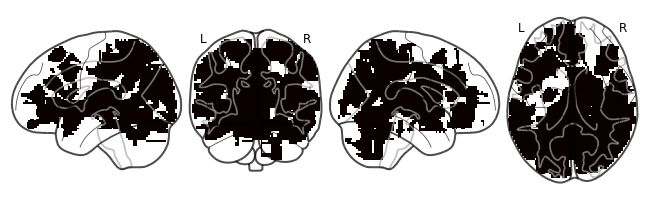

In [6]:
# Glass brain example
img = image.load_img('../results/subtraction/knowledge_minus_nknowledge_z_tresholded.nii.gz')
p = plotting.plot_glass_brain(img, display_mode='lyrz')

# Cluster table example
t = reporting.get_clusters_table(img, stat_threshold=0, min_distance=1000)
t.style.format({'X': '{:.0f}', 'Y': '{:.0f}', 'Z': '{:.0f}', 'Peak Stat': '{:.2f}'}).hide_index()

Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
1,22,-26,8,0.00,126152
2,50,6,-32,8.21,5432
3,0,60,-14,8.21,12992
4,6,-100,14,0.00,2768
5,16,-74,32,0.00,648
6,4,-32,46,8.21,8416
7,10,32,38,8.21,864
8,10,14,4,8.21,208
9,6,32,56,8.21,288
10,-40,10,-10,8.21,24360


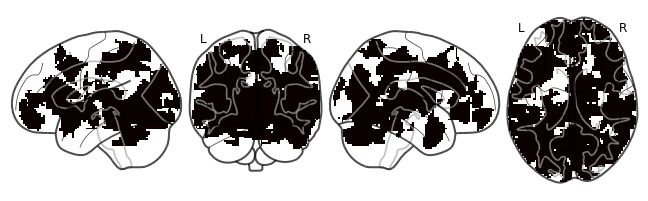

In [7]:
# Glass brain example
img = image.load_img('../results/subtraction2/knowledge_minus_nknowledge_z_tresholded.nii.gz')
p1 = plotting.plot_glass_brain(img, display_mode='lyrz')

# Cluster table example
t = reporting.get_clusters_table(img, stat_threshold=0, min_distance=1000)
t.style.format({'X': '{:.0f}', 'Y': '{:.0f}', 'Z': '{:.0f}', 'Peak Stat': '{:.2f}'}).hide_index()

Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
1,8,-10,12,8.21,87672
2,46,-28,50,0.00,18872
3,52,-4,30,8.21,216
4,44,26,24,8.21,12904
5,46,24,4,8.21,440
6,36,22,-16,8.21,288
7,4,-64,-26,8.21,28720
8,20,-70,28,0.00,1520
9,14,-96,26,8.21,344
10,-38,14,-6,8.21,21016


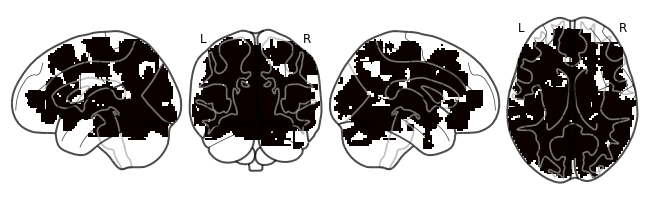

In [8]:
# Glass brain example
img = image.load_img('../results/subtraction3/knowledge_minus_nknowledge_z_tresholded.nii.gz')
p2 = plotting.plot_glass_brain(img, display_mode='lyrz')

# Cluster table example
t = reporting.get_clusters_table(img, stat_threshold=0, min_distance=1000)
t.style.format({'X': '{:.0f}', 'Y': '{:.0f}', 'Z': '{:.0f}', 'Peak Stat': '{:.2f}'}).hide_index()